In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Set dataframe with csv (buffering due to size)
# rawURL = 'https://raw.githubusercontent.com/freeCodeCamp/2016-new-coder-survey/master/clean-data/2016-FCC-New-Coders-Survey-Data.csv'
# reader = pd.read_csv(rawURL, sep = ',', dtype = str, iterator=True, chunksize=10000, engine = 'python', encoding = 'utf-8')
# df = pd.concat(reader,ignore_index = True)

In [3]:
df = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv", low_memory=False)

In [4]:
#Functions
def category_education(degree):
    #Group degrees into two categories
    high_eduction = ["associate's degree","bachelor's degree","master's degree (non-professional)","professional degree (MBA, MD, JD, etc.)","Ph.D."]
    
    if(degree in high_eduction):
        return "High-Education"
    else:
        return "Low-Education"

In [5]:
list(df);

In [6]:
len(df)

15620

In [7]:
# Drop rows where either CountryLive or SchoolDegree was not given(NaN)
df = df.dropna(axis=0, subset = ['CountryLive', 'SchoolDegree'])

In [8]:
len(df)

13506

In [9]:
#Columns to consider
selected_columns = ["CountryLive","SchoolDegree","ResourceBlogs","ResourceBooks","ResourceCodecademy","ResourceCodeWars","ResourceCoursera","ResourceDevTips",        "ResourceEdX","ResourceEggHead","ResourceFCC","ResourceGoogle","ResourceHackerRank","ResourceKhanAcademy","ResourceLynda",        "ResourceMDN","ResourceOdinProj","ResourceOther","ResourcePluralSight","ResourceReddit","ResourceSkillCrush","ResourceSoloLearn",        "ResourceStackOverflow","ResourceTreehouse","ResourceUdacity","ResourceUdemy","ResourceW3Schools","ResourceYouTube"]

In [10]:
df_selected = df.loc[:,selected_columns]

In [11]:
len(df_selected)

13506

In [12]:
df_selected.columns;

In [13]:
#Simplify naming of columns
columns_titles = [column.replace('Resource','') for column in list(df_selected.columns)]

In [14]:
df_selected.set_axis(columns_titles, axis='columns', inplace=True)

In [15]:
df_selected;

In [16]:
#Select CountryLive that belong to Aspac group
aspac = ['Afghanistan', 'Australia', 'Bangladesh', 'Brunei', 'Cambodia', 'China', 'Fiji', 'Guam', 'Hong Kong', 'India', 'Indonesia', 'Japan', 'Korea North', 'Korea South','Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'New Caledonia', 'New Zealand', 'Pakistan', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Tokelau', 'Vietnam']

In [17]:
len(aspac)

29

In [18]:
#Select only aspac countries
df_selected = df_selected.loc[df_selected.CountryLive.isin(aspac)]

In [19]:
df_selected;

In [20]:
len(df_selected)

2069

In [21]:
# df_selected.fillna(0);

In [22]:
# Create column with Higher or Lower Eduation categorization noted. (The below is a warning--rather inexplicable as I am already using the suggested code fix. The code works)
df_selected.loc[:, 'GroupEducation'] = df_selected.apply(lambda row: category_education(row['SchoolDegree']), axis=1);
# print(df_selected)

In [23]:
#Create column with sum of resources used. (The below is a warning--rather inexplicable as I am already using the suggested code fix. The code works)
df_selected.loc[:, 'TotalResources'] = df_selected.sum(axis=1)

In [24]:
df_selected

,CountryLive,SchoolDegree,Blogs,Books,Codecademy,CodeWars,Coursera,DevTips,EdX,EggHead,...,SkillCrush,SoloLearn,StackOverflow,Treehouse,Udacity,Udemy,W3Schools,YouTube,GroupEducation,TotalResources
6,Singapore,bachelor's degree,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,4.0
11,Bangladesh,"some college credit, no degree",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,3.0
22,India,bachelor's degree,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,High-Education,4.0
42,India,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,2.0
44,Bangladesh,some high school,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Low-Education,6.0
46,Singapore,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,2.0
88,Pakistan,some high school,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,1.0
94,Australia,bachelor's degree,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,3.0
95,Korea South,master's degree (non-professional),NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,High-Education,10.0
107,Australia,bachelor's degree,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,2.0


In [25]:
#Sum Columns of Resources (the only columns in this df containing numberical values)
sums = df_selected.select_dtypes(pd.np.number).sum().rename('total')

In [33]:
#Append the total for each resource to the df
df_selected.append(sums)

,CountryLive,SchoolDegree,Blogs,Books,Codecademy,CodeWars,Coursera,DevTips,EdX,EggHead,...,SkillCrush,SoloLearn,StackOverflow,Treehouse,Udacity,Udemy,W3Schools,YouTube,GroupEducation,TotalResources
6,Singapore,bachelor's degree,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,4.0
11,Bangladesh,"some college credit, no degree",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,3.0
22,India,bachelor's degree,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,High-Education,4.0
42,India,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,2.0
44,Bangladesh,some high school,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Low-Education,6.0
46,Singapore,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,2.0
88,Pakistan,some high school,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,1.0
94,Australia,bachelor's degree,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,3.0
95,Korea South,master's degree (non-professional),NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,High-Education,10.0
107,Australia,bachelor's degree,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,2.0


In [27]:
sums[:-1].idxmax()
sums_without_totalOfAllResources = sums[:-1]
sums_without_totalOfAllResources.idxmax()

'FCC'

In [28]:
sums_without_totalOfAllResources.sort_values(ascending=False);

In [35]:
df_high_education = df_selected[df_selected.GroupEducation == 'High-Education']
sums = df_high_education.select_dtypes(pd.np.number).sum().rename('total')
df_high_education.append(sums)

,CountryLive,SchoolDegree,Blogs,Books,Codecademy,CodeWars,Coursera,DevTips,EdX,EggHead,...,SkillCrush,SoloLearn,StackOverflow,Treehouse,Udacity,Udemy,W3Schools,YouTube,GroupEducation,TotalResources
6,Singapore,bachelor's degree,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,4.0
22,India,bachelor's degree,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,High-Education,4.0
94,Australia,bachelor's degree,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,3.0
95,Korea South,master's degree (non-professional),NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,High-Education,10.0
107,Australia,bachelor's degree,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High-Education,2.0
138,New Zealand,bachelor's degree,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,High-Education,4.0
140,Cambodia,master's degree (non-professional),NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,High-Education,4.0
179,Hong Kong,bachelor's degree,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,High-Education,5.0
188,Korea South,bachelor's degree,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,High-Education,7.0
224,New Zealand,bachelor's degree,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,High-Education,5.0


In [36]:
df_low_education = df_selected[df_selected.GroupEducation == 'Low-Education']
sums = df_low_education.select_dtypes(pd.np.number).sum().rename('total')
df_low_education.append(sums)

,CountryLive,SchoolDegree,Blogs,Books,Codecademy,CodeWars,Coursera,DevTips,EdX,EggHead,...,SkillCrush,SoloLearn,StackOverflow,Treehouse,Udacity,Udemy,W3Schools,YouTube,GroupEducation,TotalResources
11,Bangladesh,"some college credit, no degree",NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,3.0
42,India,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,2.0
44,Bangladesh,some high school,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Low-Education,6.0
46,Singapore,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,2.0
88,Pakistan,some high school,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,1.0
108,India,"some college credit, no degree",NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,Low-Education,7.0
174,Australia,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Low-Education,7.0
197,Australia,"some college credit, no degree",NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,3.0
264,Hong Kong,"trade, technical, or vocational training",NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Low-Education,4.0
266,Pakistan,high school diploma or equivalent (GED),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low-Education,1.0


In [29]:
#Print statistic data
df_total_education = df_selected['TotalResources']
print('Total Resources:\n')
print(df_total_education.describe())

df_high_education = df_selected[df_selected.GroupEducation == 'High-Education']
# num_people_high_education = len(df_high_education)
# print('num_people_high_education:', num_people_high_education)
df_high_education = df_high_education['TotalResources']
print('\nTotal Resources for High Education:\n')
print(df_high_education.describe())

df_low_education = df_selected[df_selected.GroupEducation == 'Low-Education']
# num_people_low_education = len(df_low_education)
# print('num_people_low_education:', num_people_low_education)
df_low_education = df_low_education['TotalResources']
print('\nTotal Resources for Low Education:\n')
print(df_low_education.describe())

Total Resources:

count    2069.000000
mean        3.161914
std         1.949651
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: TotalResources, dtype: float64

Total Resources for High Education:

count    1335.000000
mean        3.128090
std         1.874051
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: TotalResources, dtype: float64

Total Resources for Low Education:

count    734.000000
mean       3.223433
std        2.080035
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: TotalResources, dtype: float64


In [30]:
#Histogram
def create_histogram(description, df_total_education, df_high_education, df_low_education, columns_titles):
    plt.figure(figsize=(15,5))
    bins = [x//2 for x in range(len(columns_titles))]
    plt.hist(df_total_education, bins, histtype='step',stacked = True, rwidth = 0.8, label='Total', color='#000066')
    plt.hist(df_high_education, bins, histtype='bar', stacked = True, rwidth = 0.6, label='High-Education', color = '#3366FF')
    plt.hist(df_low_education, bins, histtype='bar', stacked = True, rwidth = 0.4, label='Low-Education', color = '#99CCFF')
    plt.xlabel('Number of resources utilised')
    plt.ylabel('Frequency')
    plt.title('Histogram of resources - ' + description)
    plt.grid(False)
    plt.legend()
    plt.show()
    
#Bar graph
def create_bar_graph(description, df_total_education, df_high_education, df_low_education, columns_titles):
    plt.figure(figsize=(15,5))
    labels = columns_titles[3:-2]
    x_bar = [i for i, _ in enumerate(labels)]
    plt.bar(x_bar, resource_count, width = 0.80, edgecolor = '#000066', facecolor = 'w', label='Total')
    plt.bar(x_bar, resource_high, width = 0.60, color = '#3366FF', label='High-Education')
    plt.bar(x_bar, resource_low, width = 0.40, color = '#99CCFF', label='Low-Education')
    plt.xlabel('By resource')
    plt.ylabel('Number of people')
    plt.xticks(x_bar, labels, rotation='vertical')
    plt.legend()
    plt.title('Barplot resources usage - ' + description)
    plt.grid(True, color = '#CCCCCC')
    plt.show()

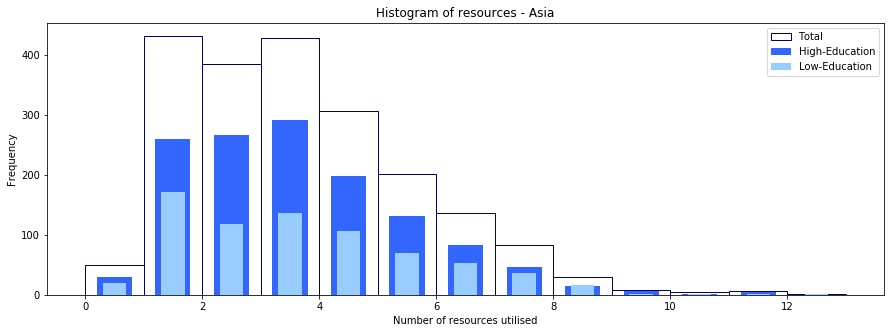

In [31]:
create_histogram('Asia', df_total_education, df_high_education, df_low_education, columns_titles)

In [32]:
create_bar_graph('Asia', df_total_education, df_high_education, df_low_education, columns_titles)

NameError: name 'resource_high' is not defined

<Figure size 1080x360 with 0 Axes>